In [33]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
from os.path import splitext 
from glob import glob
import os
%matplotlib inline 

In [9]:
lookup_labels = {0 : 'airplain (飛機)',
1 : 'automobile (汽車)',
2 : 'bird (鳥)',
3 : 'cat (貓)',
4 : 'deer (鹿)',
5 : 'dog (狗)',
6 : 'frog (青蛙)',
7 : 'horse (馬)',
8 : 'ship (船)',
9 : 'truck (卡車)'}

# 開啟照片

In [282]:
jpglist = glob('./homework_2/*.[jJ][pP][gG]')
print(jpglist)

['./homework_2\\airplane.jpg', './homework_2\\automobile.jpg', './homework_2\\bird.jpg', './homework_2\\cat.jpg', './homework_2\\deer.jpg', './homework_2\\dog.jpg', './homework_2\\frog.jpg', './homework_2\\horse.jpg', './homework_2\\ship.jpg', './homework_2\\truck.jpg']


airplane <class 'str'>


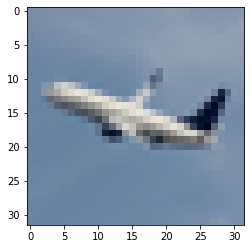

(32, 32, 3)
automobile <class 'str'>


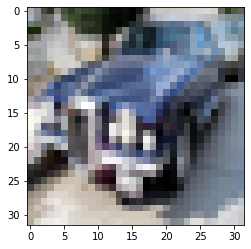

(32, 32, 3)
bird <class 'str'>


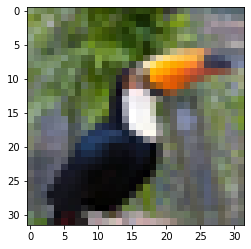

(32, 32, 3)
cat <class 'str'>


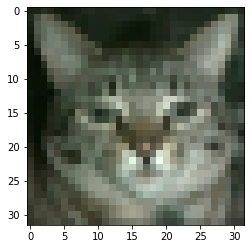

(32, 32, 3)
deer <class 'str'>


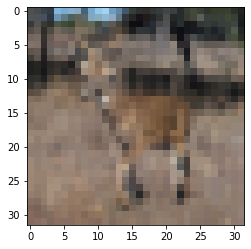

(32, 32, 3)
dog <class 'str'>


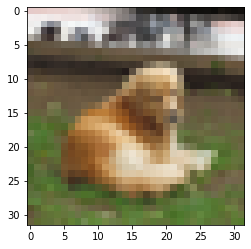

(32, 32, 3)
frog <class 'str'>


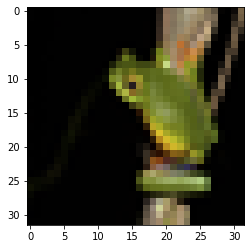

(32, 32, 3)
horse <class 'str'>


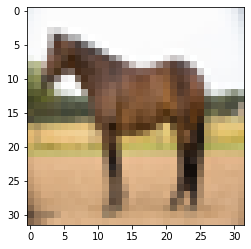

(32, 32, 3)
ship <class 'str'>


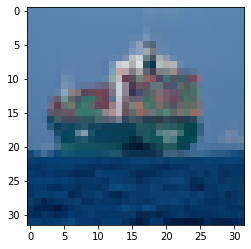

(32, 32, 3)
truck <class 'str'>


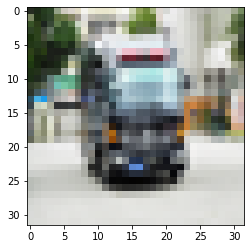

(32, 32, 3)


In [283]:
for i in jpglist:
    im = Image.open(i)
    im2 = im.resize((32,32,))
    p, f=os.path.split(i)
    label = f[ :-4]
    print(label, type(i))
    
    test_graph = np.array(im2)
    plt.imshow(test_graph, cmap='gray')
    plt.show()
    print(test_graph.shape)

# 訓練模型

In [18]:
from tensorflow.keras import datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() # keras帶有mnist 等 7種dataset
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [19]:
import numpy as np
# 資料前處理
# 特徵縮放 → (0 , 1)
x_train = train_images.astype(np.float32) / 255.0
x_test = test_images.astype(np.float32) / 255.0
# x_train[1]
# labels → one hot coding


In [20]:
# labels → one hot coding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [21]:
train_labels[1] , y_train[1]

(array([9], dtype=uint8),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

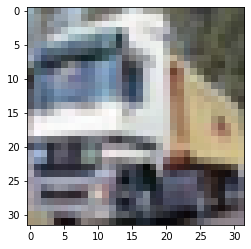

In [23]:
plt.imshow(train_images[1])

In [40]:
#建DNN模型
# cnn + maxpooling2D
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 36 
                           , kernel_size = (3 , 3)
                           , strides = (1 , 1)
                           , padding = 'same' 
                           , activation = 'relu'
                           , input_shape = (32 , 32 , 3)), #要有輸入層 , 把照片輸入進去
    tf.keras.layers.Conv2D(filters = 36 
                           , kernel_size = (3 , 3)
                           , strides = (1 , 1)
                           , padding = 'same' 
                           , activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2 , 2)), #池化層 減少參數
    tf.keras.layers.Conv2D(filters = 48 
                           , kernel_size = (3 , 3)
                           , strides = (1 , 1)
                           , padding = 'same' 
                           , activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 48 
                           , kernel_size = (3 , 3)
                           , strides = (1 , 1)
                           , padding = 'same' 
                           , activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2 , 2)), #池化層 減少參數
    tf.keras.layers.Conv2D(filters = 60 
                           , kernel_size = (3 , 3)
                           , strides = (1 , 1)
                           , padding = 'same' 
                           , activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 60
                           , kernel_size = (3 , 3)
                           , strides = (1 , 1)
                           , padding = 'same' 
                           , activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2 , 2)), #池化層 減少參數
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), # 幾 % 的神經元輸出當成 0 , 丟棄不用 , 避免過度預測
    tf.keras.layers.Dense(1000 , activation = 'relu'),
    tf.keras.layers.Dense(500 , activation = 'relu'),
    tf.keras.layers.Dense(100 , activation = 'relu'),
    tf.keras.layers.Dense(10 , activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 36)        1008      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 36)        11700     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 48)        15600     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 48)        20784     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 48)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 60)          2

In [48]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'])

In [49]:
# ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rotation_range = 10 , #旋轉
        width_shift_range = 0.1 ,     #左右平移
        height_shift_range = 0.1 ,    #上下平移
        horizontal_flip = True)        #水平翻轉

In [50]:
batch_size = 200
epochs = 20
train_history = model.fit(train_datagen.flow(x_train , y_train) ,
                          batch_size = batch_size ,
                          epochs = epochs ,
                          validation_data = (x_test , y_test))

Epoch 1/20
1563/1563 [==============================] - 109s 70ms/step - loss: 0.9123 - accuracy: 0.6807 - val_loss: 0.8105 - val_accuracy: 0.7229
Epoch 2/20
1563/1563 [==============================] - 114s 73ms/step - loss: 0.8668 - accuracy: 0.6980 - val_loss: 0.7763 - val_accuracy: 0.7352
Epoch 3/20
1563/1563 [==============================] - 111s 71ms/step - loss: 0.8465 - accuracy: 0.7078 - val_loss: 0.7213 - val_accuracy: 0.7518
Epoch 4/20
1563/1563 [==============================] - 114s 73ms/step - loss: 0.8134 - accuracy: 0.7160 - val_loss: 0.7159 - val_accuracy: 0.7543
Epoch 5/20
1563/1563 [==============================] - 114s 73ms/step - loss: 0.7943 - accuracy: 0.7264 - val_loss: 0.7389 - val_accuracy: 0.7465
Epoch 6/20
1563/1563 [==============================] - 117s 75ms/step - loss: 0.7809 - accuracy: 0.7297 - val_loss: 0.7247 - val_accuracy: 0.7578
Epoch 7/20
1563/1563 [==============================] - 123s 79ms/step - loss: 0.7678 - accuracy: 0.7364 - val_loss: 0

In [51]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.6068 - accuracy: 0.8004


[0.6067537069320679, 0.8004000186920166]

In [52]:
y_pred = model.predict(x_test)
y_pred[:3]

array([[1.1140204e-03, 1.7465609e-03, 9.1884565e-03, 8.2735986e-01,
        4.5287739e-03, 1.2962824e-01, 1.9694023e-02, 2.7144633e-03,
        2.2829685e-03, 1.7427099e-03],
       [3.5589279e-04, 2.4922937e-01, 2.0800301e-06, 7.4122198e-07,
        1.4930339e-07, 4.8523843e-06, 2.0437981e-06, 2.0281002e-08,
        7.4994010e-01, 4.6466995e-04],
       [4.1087519e-02, 2.7505794e-01, 2.9525848e-03, 1.6267481e-03,
        9.0850907e-04, 2.9128974e-03, 2.4884820e-03, 4.7157516e-04,
        6.4492905e-01, 2.7564641e-02]], dtype=float32)

In [53]:
y_hat = np.argmax(y_pred,axis=1)# 沿著column來計算每張圖片的預測結果
y_hat

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [54]:
test_labels.flatten()

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [55]:
# crosstab 混淆矩陣/ 交叉列表
import pandas as pd
pd.crosstab(test_labels.flatten(), y_hat, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,881,23,7,6,5,1,5,8,36,28
1,5,929,1,3,1,1,2,0,3,55
2,109,8,588,32,44,39,122,36,6,16
3,42,7,24,585,47,97,112,53,11,22
4,20,1,33,28,750,10,96,54,3,5
5,13,4,17,137,26,693,37,62,1,10
6,12,1,5,27,11,9,921,6,3,5
7,18,2,11,25,20,18,27,862,3,14
8,53,34,1,3,0,1,4,3,876,25


In [56]:
model.save('image_test_model.h5')

# 實拍照片特徵強化

(409, 433, 3)


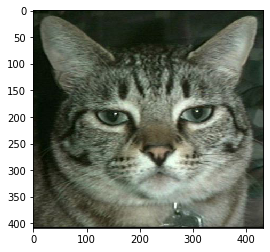

In [263]:
import  numpy as np
import  matplotlib.pyplot as plt
from PIL import Image
img = Image.open('./homework_2/cat.jpg') #先轉灰階
# img2 = img.resize((32,32))
array = np.array(img)
print(array.shape)
plt.imshow(array)


In [240]:
import cv2
print('建立kernel-1、銳利化')
kernel1 = np.array((
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]),
    dtype='int')
print(kernel1)

建立kernel-1、銳利化
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


In [241]:
filter_1 = cv2.filter2D(array,-1,kernel1) # 換成img灰階 #-1是指維持圖片大小

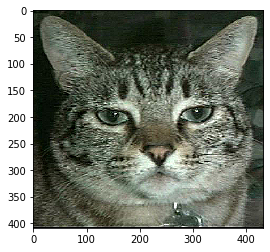

In [269]:
from PIL import Image 
Kener1_out = Image.fromarray(filter_1)
plt.imshow(Kener1_out)
array_2 = Kener1_out.resize((32,32))
array_3 = np.array(array_2)

In [270]:
array_3

array([[[ 23,  34,  19],
        [ 25,  35,  20],
        [ 38,  47,  31],
        ...,
        [ 40,  50,  35],
        [ 42,  55,  41],
        [ 31,  41,  30]],

       [[ 33,  42,  26],
        [ 70,  77,  62],
        [ 99, 103,  87],
        ...,
        [131, 136, 117],
        [128, 133, 116],
        [ 47,  58,  47]],

       [[ 27,  34,  21],
        [ 86,  90,  77],
        [ 99, 107,  93],
        ...,
        [139, 146, 132],
        [127, 133, 118],
        [ 49,  61,  49]],

       ...,

       [[ 54,  54,  42],
        [ 69,  70,  56],
        [ 76,  76,  63],
        ...,
        [ 91,  93,  86],
        [ 71,  72,  64],
        [ 82,  83,  75]],

       [[ 53,  53,  41],
        [ 72,  73,  58],
        [ 68,  69,  52],
        ...,
        [ 79,  81,  72],
        [ 68,  69,  62],
        [ 73,  75,  67]],

       [[ 53,  53,  43],
        [ 61,  62,  50],
        [ 65,  67,  53],
        ...,
        [ 70,  71,  64],
        [ 58,  59,  53],
        [ 58,  59,  52]]

建立kernel-3、邊緣偵測
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


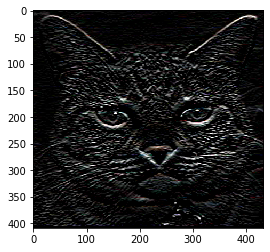

In [230]:
#邊緣偵測練習
print('建立kernel-3、邊緣偵測')
kernal3 = np.array((
    [-1 , -2 , -1],
    [0 , 0 , 0],
    [1 , 2 , 1]))
print(kernal3)
array_2 = np.array(Kener1_out)
filter_3 = cv2.filter2D(array , -1 , kernal3)
filter_3
kernel3_out = Image.fromarray(filter_3)
array_3 = np.array(kernel3_out)
plt.imshow(kernel3_out)

In [271]:
test_1_pred = model.predict(array_3.reshape(-1,32,32,3).astype(np.float32))
test_1_pred

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 6.48197e-11, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]],
      dtype=float32)

In [272]:
print(f,'-->', lookup_labels[np.argmax(test_1_pred, axis=1)[0]])

truck.jpg --> dog (狗)


# 載入模組

In [286]:
#讀取DNN_notmnist_model
import tensorflow as tf
model = tf.keras.models.load_model('image_test_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 36)        1008      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 36)        11700     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 48)        15600     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 48)        20784     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 48)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 60)          2

airplane --> airplain (飛機)


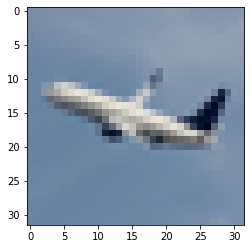

(32, 32, 3)
automobile --> automobile (汽車)


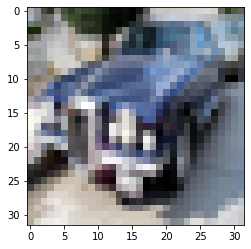

(32, 32, 3)
bird --> horse (馬)


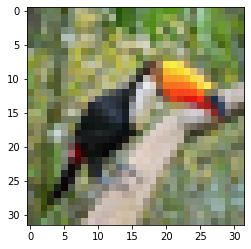

(32, 32, 3)
cat --> dog (狗)


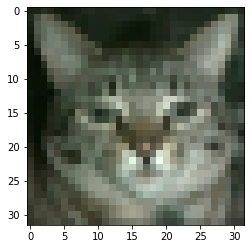

(32, 32, 3)
deer --> horse (馬)


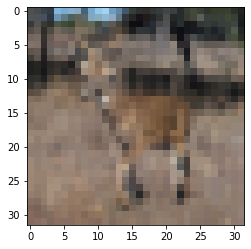

(32, 32, 3)
dog --> dog (狗)


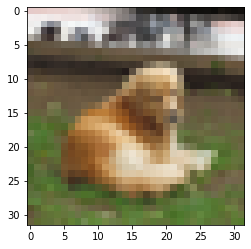

(32, 32, 3)
frog --> frog (青蛙)


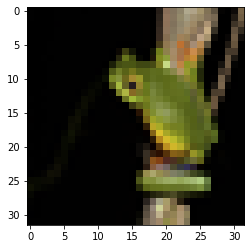

(32, 32, 3)
horse --> horse (馬)


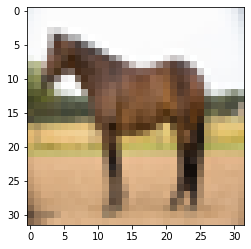

(32, 32, 3)
ship --> airplain (飛機)


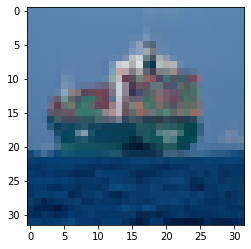

(32, 32, 3)
truck --> truck (卡車)


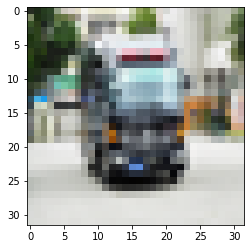

(32, 32, 3)


In [285]:
for i in jpglist:
    im = Image.open(i)
    im2 = im.resize((32,32,))
    p, f=os.path.split(i)
    p, f=os.path.split(i)
    label = f[ :-4]
    test_graph = np.array(im2)
    test_pred = model.predict(test_graph.reshape(-1,32,32,3).astype(np.float32))
   
    print(label,'-->', lookup_labels[np.argmax(test_pred, axis=1)[0]])
    plt.imshow(test_graph, cmap='gray')
    plt.show()
    print(test_graph.shape)